Start time: 2024-11-15 17:16:40
eta0 [-0.01       -0.01        0.00875318  0.          0.          0.        ]
v0 [-0.01       -0.01        0.00875318  0.          0.          0.        ]
v0[0]/eta0[0] 1.0
v0[1]/eta0[1] 1.0
v0[2]/eta0[2] 1.0
v0[3]/eta0[3] nan
v0[4]/eta0[4] nan
v0[5]/eta0[5] nan
lambda_vals [0.51634752 1.09634412 1.4047235  0.99204072 0.99204072 1.63190875]


C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\2376255292.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  eta[:, i] = A * np.exp(lambda_i * z) + B * np.exp(-lambda_i * z)
C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\2376255292.py:70: RuntimeWarning: invalid value encountered in scalar divide
  print('v0[3]/eta0[3]',v0[3]/eta0[3])
C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\2376255292.py:71: RuntimeWarning: invalid value encountered in scalar divide
  print('v0[4]/eta0[4]',v0[4]/eta0[4])
C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\2376255292.py:72: RuntimeWarning: invalid value encountered in scalar divide
  print('v0[5]/eta0[5]',v0[5]/eta0[5])


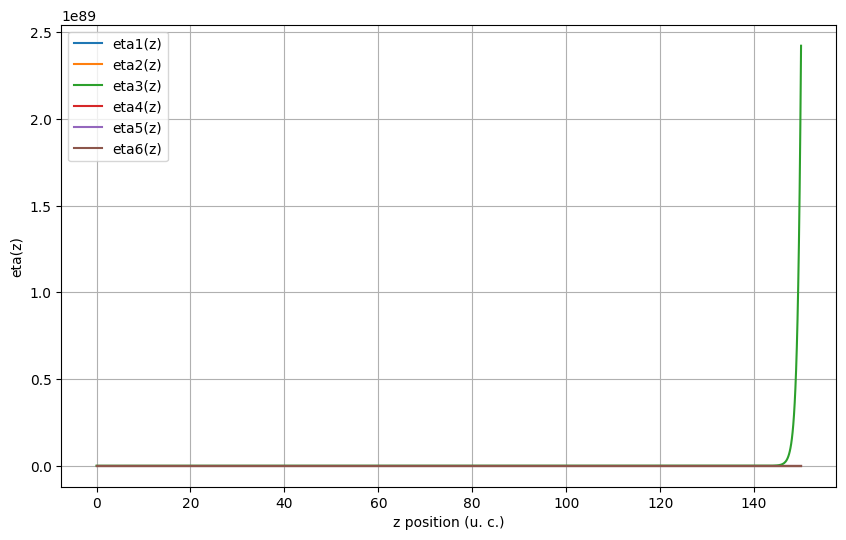

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
import datetime

print('Start time:',datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# Set parameters
a0=3.96883 # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0 #[eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3 #[eV/Angstrom^3]
d1xx, d1yy, d4yz = -114.02, -13.6748, -22.67 #[eV/Angstrom^2]
D1xx, D1yy, D4yz = d1xx/a0**3, d1yy/a0**3, d4yz/a0**3 #[eV/Angstrom^5]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  #[eV/Angstrom], Alminum DOI: 10.1016/j.commatsci.2019.109316
F11, F12, F44 = -0.20E-6, -0.25E-9, 0  #[C/m]

C = np.array([[C11, C12, C12, 0, 0, 0],
              [C12, C11, C12, 0, 0, 0],
              [C12, C12, C11, 0, 0, 0],
              [0, 0, 0, C44, 0, 0],
              [0, 0, 0, 0, C44, 0],
              [0, 0, 0, 0, 0, C44]])
D = np.array([[D1xx, D1yy, D1yy, 0, 0, 0],
              [D1yy, D1xx, D1yy, 0, 0, 0],
              [D1yy, D1yy, D1xx, 0, 0, 0],
              [0, 0, 0, D4yz, 0, 0],
              [0, 0, 0, 0, D4yz, 0],
              [0, 0, 0, 0, 0, D4yz]])
E = np.array([[2*E22, E24, E12, 0, 0, 0],
              [E24, 2*E22, E12, 0, 0, 0],
              [E12, E12, 2*E11, 0, 0, 0],
              [0, 0, 0, 8*E33, 0, 0],
              [0, 0, 0, 0, 8*E33, 0],
              [0, 0, 0, 0, 0, 8*E1616]])
# E = np.identity(6) # Simplified for initial testing
F = np.array([[F11, F12, F12, 0, 0, 0],
              [F12, F11, F12, 0, 0, 0],
              [F12, F12, F11, 0, 0, 0],
              [0, 0, 0, F44, 0, 0],
              [0, 0, 0, 0, F44, 0],
              [0, 0, 0, 0, 0, F44]])

# Initial condition
z = np.linspace(0, 150, 1000)
um=-0.01
alpha=1.0

eta0 = np.array([um, um, -2*C12*um/C11, 0, 0, 0])
# Calculate eigenvalues and eigenvectors
eigvals, eigvecs = eig(np.linalg.inv(E) @ C)
lambda_vals = np.array([eigvals[0],eigvals[1],eigvals[2],eigvals[3],eigvals[4],eigvals[5]])
#want to use real part of eigvals
lambda_vals = np.real(lambda_vals)
v0 = np.array([um, um, -2*C12*um/C11, 0, 0, 0])
# v0 = -lambda_vals * eta0

# Calculate the general solution
eta = np.zeros((len(z), len(eta0)))
for i in range(len(eta0)):
    lambda_i = eigvals[i]
    # Determine A and B based on initial conditions
    A = 0.5*eta0[i]+(0.5/lambda_i)*v0[i]
    B = 0.5*eta0[i]-(0.5/lambda_i)*v0[i]
    eta[:, i] = A * np.exp(lambda_i * z) + B * np.exp(-lambda_i * z)
print('eta0',eta0)
print('v0',v0)
print('v0[0]/eta0[0]',v0[0]/eta0[0])
print('v0[1]/eta0[1]',v0[1]/eta0[1])
print('v0[2]/eta0[2]',v0[2]/eta0[2])
print('v0[3]/eta0[3]',v0[3]/eta0[3])
print('v0[4]/eta0[4]',v0[4]/eta0[4])
print('v0[5]/eta0[5]',v0[5]/eta0[5])

print('lambda_vals',lambda_vals)

# Output the results
plt.figure(figsize=(10, 6))
for i in range(eta.shape[1]):
    plt.plot(z, eta[:, i], label=f'eta{i+1}(z)')

# plt.xlim(0, 140)
# plt.ylim(-100000, 100000)
plt.xlabel('z position (u. c.)')
plt.ylabel('eta(z)')
# plt.title('Analytical Solution of eta values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
a0=3.96883 # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0 #[eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3 #[eV/Angstrom^3]
d1xx, d1yy, d4yz = -114.02, -13.6748, -22.67 #[eV/Angstrom^2]
D1xx, D1yy, D4yz = d1xx/a0**3, d1yy/a0**3, d4yz/a0**3 #[eV/Angstrom^5]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  #[eV/Angstrom], Alminum DOI: 10.1016/j.commatsci.2019.109316
F11, F12, F44 = -0.20E-6, -0.25E-9, 0  #[C/m]

C = np.array([[C11, C12, C12, 0, 0, 0],
              [C12, C11, C12, 0, 0, 0],
              [C12, C12, C11, 0, 0, 0],
              [0, 0, 0, C44, 0, 0],
              [0, 0, 0, 0, C44, 0],
              [0, 0, 0, 0, 0, C44]])
D = np.array([[D1xx, D1yy, D1yy, 0, 0, 0],
              [D1yy, D1xx, D1yy, 0, 0, 0],
              [D1yy, D1yy, D1xx, 0, 0, 0],
              [0, 0, 0, D4yz, 0, 0],
              [0, 0, 0, 0, D4yz, 0],
              [0, 0, 0, 0, 0, D4yz]])
E = np.array([[2*E22, E24, E12, 0, 0, 0],
              [E24, 2*E22, E12, 0, 0, 0],
              [E12, E12, 2*E11, 0, 0, 0],
              [0, 0, 0, 8*E33, 0, 0],
              [0, 0, 0, 0, 8*E33, 0],
              [0, 0, 0, 0, 0, 8*E1616]])
# E = np.identity(6) # Simplified for initial testing
F = np.array([[F11, F12, F12, 0, 0, 0],
              [F12, F11, F12, 0, 0, 0],
              [F12, F12, F11, 0, 0, 0],
              [0, 0, 0, F44, 0, 0],
              [0, 0, 0, 0, F44, 0],
              [0, 0, 0, 0, 0, F44]])

# Initial condition
z = np.linspace(0, 150, 1000)
um=-0.01
alpha=1.0

eta0 = np.array([um, um, -2*C12*um/C11, 0, 0, 0])
# Calculate eigenvalues and eigenvectors
eigvals, eigvecs = eig(np.linalg.inv(E) @ C)
lambda_vals = np.array([eigvals[0],eigvals[1],eigvals[2],eigvals[3],eigvals[4],eigvals[5]])
#want to use real part of eigvals
lambda_vals = np.real(lambda_vals)
v0 = np.array([um, um, -2*C12*um/C11, 0, 0, 0])
# v0 = -lambda_vals * eta0

# Calculate the general solution
eta = np.zeros((len(z), len(eta0)))
for i in range(len(eta0)):
    lambda_i = eigvals[i]
    # Determine A and B based on initial conditions
    A = 0.5*eta0[i]+(0.5/lambda_i)*v0[i]
    B = 0.5*eta0[i]-(0.5/lambda_i)*v0[i]
    eta[:, i] = A * np.exp(lambda_i * z) + B * np.exp(-lambda_i * z)
print('eta0',eta0)
print('v0',v0)
print('v0[0]/eta0[0]',v0[0]/eta0[0])
print('v0[1]/eta0[1]',v0[1]/eta0[1])
print('v0[2]/eta0[2]',v0[2]/eta0[2])
print('v0[3]/eta0[3]',v0[3]/eta0[3])
print('v0[4]/eta0[4]',v0[4]/eta0[4])
print('v0[5]/eta0[5]',v0[5]/eta0[5])

print('lambda_vals',lambda_vals)

# Output the results
plt.figure(figsize=(10, 6))
for i in range(eta.shape[1]):
    plt.plot(z, eta[:, i], label=f'eta{i+1}(z)')

# plt.xlim(0, 140)
# plt.ylim(-100000, 100000)
plt.xlabel('z position (u. c.)')
plt.ylabel('eta(z)')
# plt.title('Analytical Solution of eta values')
plt.legend()
plt.grid(True)
plt.show()

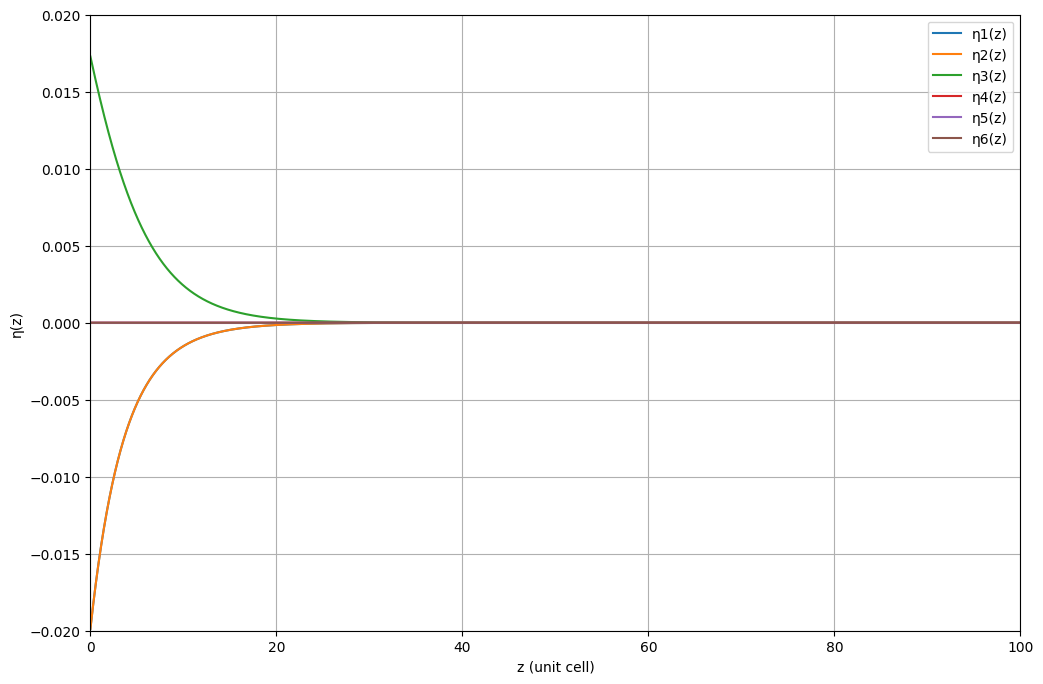

array([[-1.98836662e-02, -1.98781381e-02, -1.98726116e-02, ...,
        -2.14519900e-12, -2.14471598e-12, -2.14423307e-12],
       [-1.98836662e-02, -1.98781381e-02, -1.98726116e-02, ...,
        -2.14519900e-12, -2.14471598e-12, -2.14423307e-12],
       [ 1.72847403e-02,  1.72819518e-02,  1.72791635e-02, ...,
         4.08669722e-12,  4.08577704e-12,  4.08485706e-12],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.12410396e-35,  5.12203438e-35,  5.11996563e-35, ...,
         1.46494816e-52,  1.46435648e-52,  1.46376504e-52]])

In [1]:
import numpy as np
from scipy.linalg import eigh,eig
import matplotlib.pyplot as plt

# Set parameters
a0=3.96883 # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0 #[eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3 #[eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  #[eV/Angstrom], Alminum DOI: 10.1016/j.commatsci.2019.109316
D1xx, D1yy, D4yz = -114.02, -13.6748, -22.67 #[eV/Angstrom^2]

# Construct matrix C
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

# Construct matrix E
E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])
D = np.array([[D1xx, D1yy, D1yy, 0, 0, 0],
              [D1yy, D1xx, D1yy, 0, 0, 0],
              [D1yy, D1yy, D1xx, 0, 0, 0],
              [0, 0, 0, D4yz, 0, 0],
              [0, 0, 0, 0, D4yz, 0],
              [0, 0, 0, 0, 0, D4yz]])


# Prepare general solution
# Initial conditions
um = -0.02
min_val = 1e-34
eta0 = np.array([um, um, -2*C12*um/C11, min_val, min_val, min_val])
v0 = np.array([min_val, min_val, min_val, min_val, min_val, min_val])

# Eigenvalue problem: (-E k^2 + C) v = 0
E_inv = np.linalg.inv(E*10)
eigvals, eigvecs = eigh(E_inv @ C)

# Positive eigenvalues and corresponding eigenvectors
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# Calculate a using the initial conditions
A = np.vstack([vectors, -vectors * np.diag(k_values)])
b = np.hstack([eta0, v0])
a = np.linalg.lstsq(A, b, rcond=None)[0]

# Define the range for z
z_max = 100
z = np.linspace(0, z_max, 100000)

# Calculate K components
y_pol = np.random.uniform(0, 0.01, size=(6, z_max))
addition_term = np.zeros((6, z_max))
K = D@y_pol + addition_term

# Calculate the general solution
eta_h = vectors @ (a[:, np.newaxis] * np.exp(-k_values[:, np.newaxis] * z))

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(z, eta_h[i, :], label=f'η{i+1}(z)')
plt.xlabel('z (unit cell)')
plt.ylabel('η(z)')
# plt.title('Solution η(z) of the Differential Equation with Exact Initial Conditions')
plt.xlim(0, 100)
plt.ylim(-0.02, 0.02)
plt.legend()
plt.grid(True)
plt.show()

# # Plot the results
# for i in range(6):
#     plt.figure(figsize=(12, 8))
#     plt.plot(z, eta[i, :], label=f'η{i+1}(z)')
#     plt.xlabel('z (unit cell)')
#     plt.ylabel('η(z)')
#     plt.xlim(0, 100)
#     plt.ylim(-0.02, 0.02)
#     # plt.title('Solution η(z) of the Differential Equation with Exact Initial Conditions')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
eta

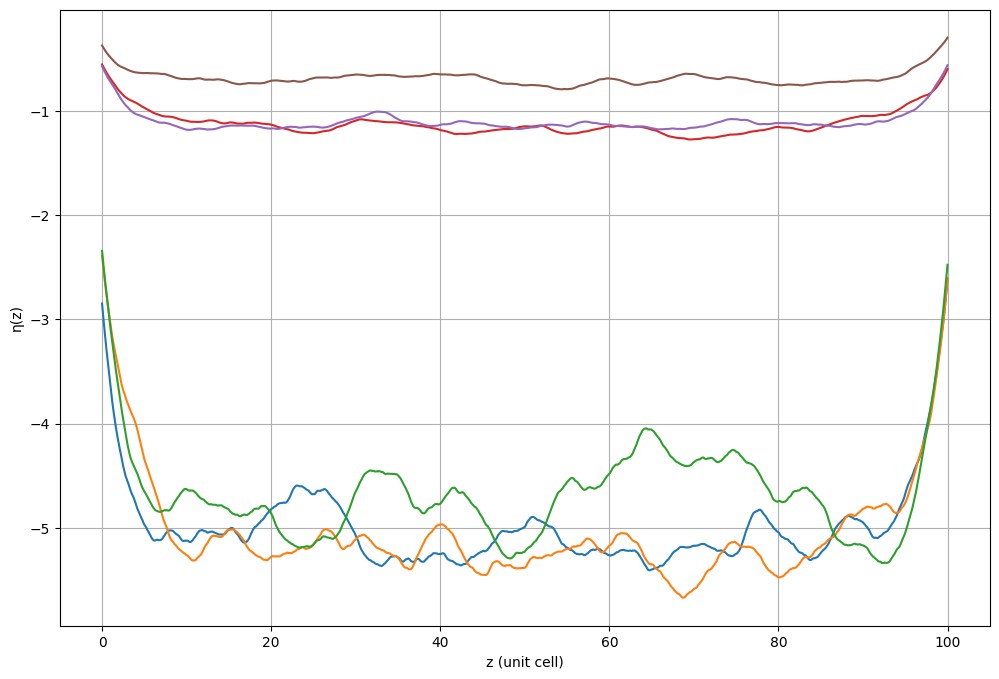

In [14]:
import numpy as np
from scipy.linalg import eigh

# Set parameters
a0 = 3.96883  # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0  # [eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3  # [eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  # [eV/Angstrom]
D1xx, D1yy, D4yz = -114.02, -13.6748, -22.67  # [eV/Angstrom^2]

# Construct matrices C, E, and D
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

D = np.array([
    [D1xx, D1yy, D1yy, 0, 0, 0],
    [D1yy, D1xx, D1yy, 0, 0, 0],
    [D1yy, D1yy, D1xx, 0, 0, 0],
    [0, 0, 0, D4yz, 0, 0],
    [0, 0, 0, 0, D4yz, 0],
    [0, 0, 0, 0, 0, D4yz]
])

# Solving the eigenvalue problem
E_inv = np.linalg.inv(E*10)
eigvals, eigvecs = eigh(E_inv @ C)

# Get positive eigenvalues and corresponding eigenvectors
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# Define the Green's function
def green_function(z, xi, k_values, vectors):
    G = np.zeros((6, 6))
    for i, k in enumerate(k_values):
        v = vectors[:, i]
        if z > xi:
            G += np.outer(v, v) * np.exp(-k * (z - xi)) / (2*k)
        else:
            G += np.outer(v, v) * np.exp(k * (z - xi)) / (2*k)
    return G

# Solve with Green's function
def solve_with_green(z_values, K, k_values, vectors):
    eta = np.zeros((6, len(z_values)))
    dz = z_values[1] - z_values[0]
    for i, z in enumerate(z_values):
        for j, xi in enumerate(z_values):
            G = green_function(z, xi, k_values, vectors)
            eta[:, i] += G @ K[:, j] * dz
    return eta

# Set the range for z
z_max = 100
z_values = np.linspace(0, z_max, 1000)

# Set the non-homogeneous term K(z)
y_pol = np.random.uniform(0, 0.01, size=(6, len(z_values)))
K = D @ y_pol

# Calculate the general solution
eta_solution = solve_with_green(z_values, K, k_values, vectors)

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(z_values, eta_solution[i, :], label=f'η{i+1}(z)')
plt.xlabel('z (unit cell)')
plt.ylabel('η(z)')
# plt.xlim(0, 100)
# plt.ylim(-0.02, 0.02)
# plt.title('Solution of the Differential Equation')
plt.grid(True)
plt.show()


C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\1712775080.py:84: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda xi: green_function(z[i], xi, vectors, k_values)[j, :] @ K[:, int(xi)], 0, z_max)
C:\Users\kishihama\AppData\Local\Temp\ipykernel_21116\1712775080.py:84: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(lambda xi: green_function(z[i], xi, vectors, k_values)[j, :] @ K[:, int(xi)], 0, z_max)


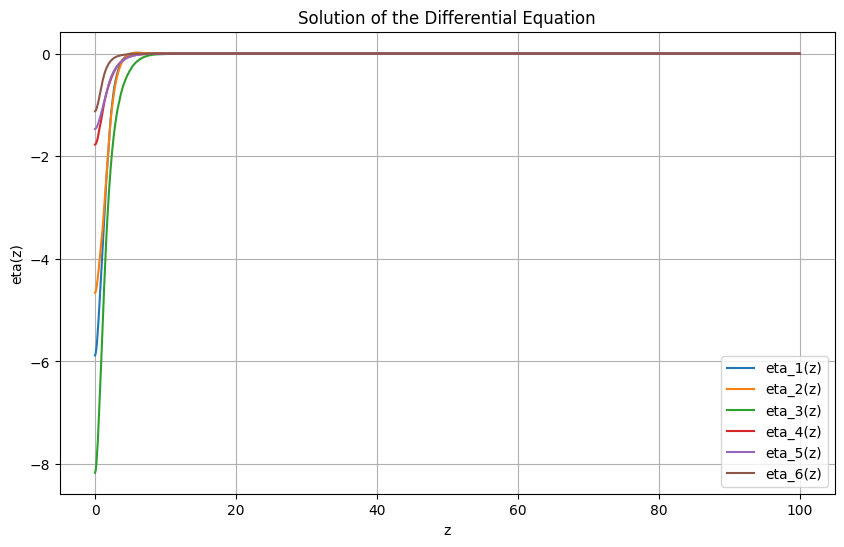

In [3]:
import numpy as np
from scipy.linalg import eigh
from scipy.integrate import quad


# Set parameters
a0 = 3.96883  # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0  # [eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3  # [eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  # [eV/Angstrom]
D1xx, D1yy, D4yz = -114.02, -13.6748, -22.67  # [eV/Angstrom^2]

# Construct matrices C, E, and D
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

D = np.array([
    [D1xx, D1yy, D1yy, 0, 0, 0],
    [D1yy, D1xx, D1yy, 0, 0, 0],
    [D1yy, D1yy, D1xx, 0, 0, 0],
    [0, 0, 0, D4yz, 0, 0],
    [0, 0, 0, 0, D4yz, 0],
    [0, 0, 0, 0, 0, D4yz]
])

# Initial conditions
um = -0.02
min_val = 1e-34
eta0 = np.array([um, um, -2*C12*um/C11, min_val, min_val, min_val])
v0 = np.array([min_val, min_val, min_val, min_val, min_val, min_val])

# Calculate the eigenvalues and eigenvectors
E_inv = np.linalg.inv(E)
eigvals, eigvecs = eigh(E_inv @ C)

# Solve the eigenvalue problem
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# Calculate a using the initial conditions
A = np.vstack([vectors, -vectors * np.diag(k_values)])
b = np.hstack([eta0, v0])
a = np.linalg.lstsq(A, b, rcond=None)[0]

# Set the range for z
z_max = 100
z = np.linspace(0, z_max, 1000)

# Set the non-homogeneous term K(z)
y_pol = np.random.uniform(0, 0.1, size=(6, len(z)))
addition_term = np.zeros((6, len(z)))
K = D @ y_pol + addition_term

# Define the Green's function
def green_function(z, xi, vectors, k_values):
    G = np.zeros((6, 6))
    for i in range(len(k_values)):
        if z < xi:
            G += np.outer(vectors[:, i], vectors[:, i]) * np.exp(-k_values[i] * xi)
        else:
            G += np.outer(vectors[:, i], vectors[:, i]) * np.exp(-k_values[i] * z)
    return G

# Calculate the solution of the differential equation
eta = np.zeros((6, len(z)))
for i in range(len(z)):
    for j in range(6):
        integral, _ = quad(lambda xi: green_function(z[i], xi, vectors, k_values)[j, :] @ K[:, int(xi)], 0, z_max)
        eta[j, i] = integral



plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(z, eta[i, :], label=f'eta_{i+1}(z)')
plt.xlabel('z')
plt.ylabel('eta(z)')
plt.title('Solution of the Differential Equation')
plt.legend()
plt.grid(True)
plt.show()


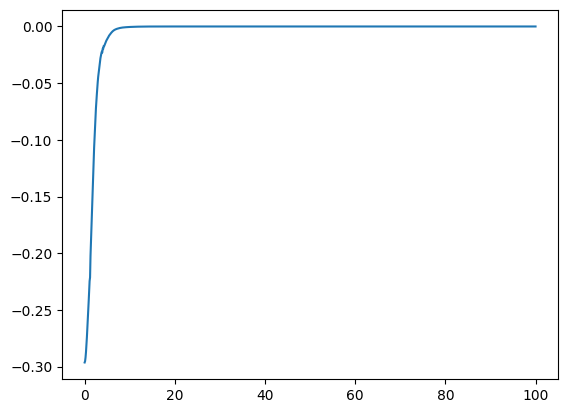

In [10]:
import numpy as np
from scipy.linalg import eigh
from scipy.integrate import quad


# Set parameters
a0 = 3.96883  # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0  # [eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3  # [eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  # [eV/Angstrom]
D1xx, D1yy, D4yz = -114.02, -13.6748, -22.67  # [eV/Angstrom^2]

# Construct matrices C, E, and D
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

D = np.array([
    [D1xx, D1yy, D1yy, 0, 0, 0],
    [D1yy, D1xx, D1yy, 0, 0, 0],
    [D1yy, D1yy, D1xx, 0, 0, 0],
    [0, 0, 0, D4yz, 0, 0],
    [0, 0, 0, 0, D4yz, 0],
    [0, 0, 0, 0, 0, D4yz]
])

# Initial conditions
um = -0.02
min_val = 1e-34
eta0 = np.array([um, um, -2*C12*um/C11, min_val, min_val, min_val])
v0 = np.array([min_val, min_val, min_val, min_val, min_val, min_val])

# Calculate the eigenvalues and eigenvectors
E_inv = np.linalg.inv(E)
eigvals, eigvecs = eigh(E_inv @ C)

# Solve the eigenvalue problem
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# Calculate a using the initial conditions
A = np.vstack([vectors, -vectors * np.diag(k_values)])
b = np.hstack([eta0, v0])
a = np.linalg.lstsq(A, b, rcond=None)[0]

# Set the range for z
z_max = 100
z = np.linspace(0, z_max, 1000)

# Set the non-homogeneous term K(z)
y_pol = np.random.uniform(0, 0.1, size=(6, len(z)))
addition_term = np.zeros((6, len(z)))
K = D @ y_pol + addition_term

# Define the Green's function
def green_function(z, xi, vectors, k_values):
    G = np.zeros((6, 6))
    for i in range(len(k_values)):
        if z < xi:
            G = 0
            # G += np.outer(vectors[:, i], vectors[:, i]) * np.exp(-k_values[i] * xi)
        else:
            G += np.outer(vectors[:, i], vectors[:, i]) * np.exp(-k_values[i] * z)
    return G

# Calculate the solution of the differential equation
eta = np.zeros((6, len(z)))
for i in range(len(z)):
    for j in range(6):
        integral, _ = quad(lambda xi: green_function(z[i], xi, vectors, k_values)[j, :] @ K[:, int(xi)], 0, z_max)
        eta[j, i] = integral



plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(z, eta[i, :], label=f'eta_{i+1}(z)')
plt.xlabel('z')
plt.ylabel('eta(z)')
plt.title('Solution of the Differential Equation')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
eta

array([[-7.68879444e-02, -7.63899861e-02, -7.50351281e-02, ...,
        -6.13561258e-32, -5.71227767e-32, -5.31926887e-32],
       [-2.44901414e-02, -2.42742384e-02, -2.36961316e-02, ...,
        -6.13561258e-32, -5.71227767e-32, -5.31926887e-32],
       [-6.93715708e-02, -6.25031210e-02, -6.67223655e-02, ...,
         1.16886110e-31,  1.08821395e-31,  1.01334405e-31],
       [-7.93220006e-03, -7.92346649e-03, -7.90125414e-03, ...,
        -8.49900057e-44, -7.69262761e-44, -6.96265923e-44],
       [-4.20529808e-03, -4.19673022e-03, -4.16461983e-03, ...,
        -7.33580334e-44, -6.64088062e-44, -6.01071456e-44],
       [-6.61191482e-03, -6.58861435e-03, -6.52534785e-03, ...,
        -4.31096013e-56, -3.79488093e-56, -3.33935935e-56]])

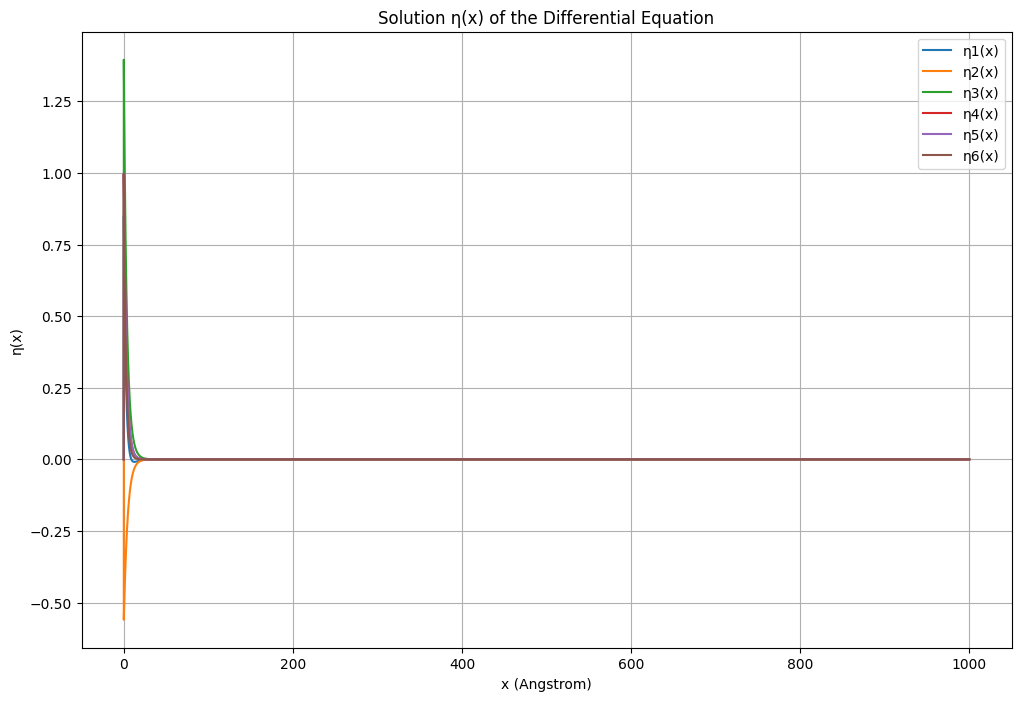

In [5]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Set parameters
a0=3.96883 # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0 #[eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3 #[eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  #[eV/Angstrom], Alminum DOI: 10.1016/j.commatsci.2019.109316

# Construct matrix C
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

# Construct matrix E
E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

# Initial conditions
um = -0.001
min_val = 1e-34
eta0 = np.array([um, um, -2*C12*um/C11, min_val, min_val, min_val])
v0 = np.array([min_val, min_val, min_val, min_val, min_val, min_val])

# Eigenvalue problem: (-E k^2 + C) v = 0
# Rearrange to E^{-1} C v = k^2 v
E_inv = np.linalg.inv(E*10)
eigvals, eigvecs = eigh(E_inv @ C)

# Select eigenvalues with positive k^2 for decaying solutions
positive_eigvals = eigvals[eigvals > 0]
k_values = np.sqrt(positive_eigvals)

# Select corresponding eigenvectors
vectors = eigvecs[:, eigvals > 0]

# Define the range for x
x_max = 1000
x = np.linspace(0, x_max, 100000)

# Construct the general solution
eta = np.zeros((6, len(x)))
for i, k in enumerate(k_values):
    eta += vectors[:, i].reshape(6,1) * np.exp(-k * x)

# Apply initial conditions (approximate by scaling)
# This step may require optimization for precise fitting
eta[:, 0] = eta0

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(6):
    # plt.plot(x, np.log(eta[i, :]+min_val), label=f'η{i+1}(x)')
    plt.plot(x, eta[i, :], label=f'η{i+1}(x)')
# plt.plot(x, eta[0, :], label=f'η{i+1}(x)')
# plt.xlim(10,100)
# plt.ylim(-0.1,0.1)
plt.xlabel('x (Angstrom)')
plt.ylabel('η(x)')
plt.title('Solution η(x) of the Differential Equation')
plt.legend()
plt.grid(True)
plt.show()

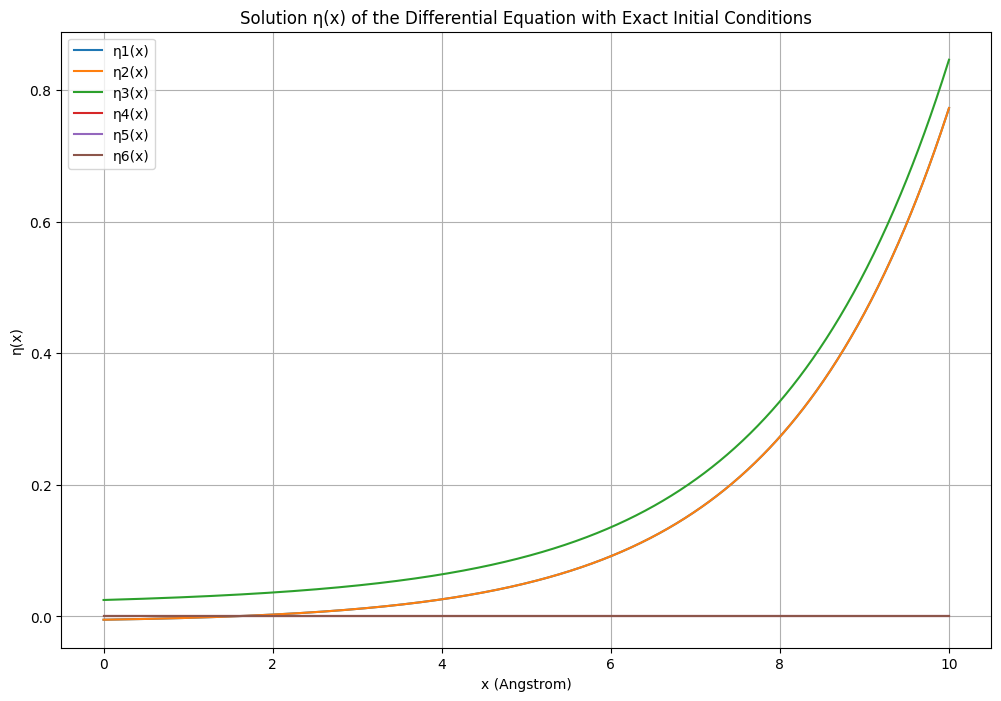

In [12]:
import numpy as np
from scipy.linalg import eigh,eig
import matplotlib.pyplot as plt

# 定数の定義
C11, C12, C44 = 0.5, 0.4, 2  # eV/Angstrom^3
E11, E12, E22, E24, E33, E1616 = 1, 0.2, 1, 0.5, 0.2, 0.3  # eV/Angstrom

# マトリックス C の構築
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

# マトリックス E の構築
E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

# 初期条件
eta0 = np.array([-0.01, -0.01, 0.05, 0, 0, 0])  # η(0)
v0 = np.array([0, 0, 0, 0, 0, 0])               # dη/dx (0)

# 1階のシステムに変換するための行列
# システム: y' = A y
# y = [eta, d(eta)/dx]^T
# この場合、A は次のようになります:
# A = [0, I; E^{-1} C, 0]

I = np.identity(C.shape[0])
E_inv = np.linalg.inv(E)
A = np.block([
    [np.zeros_like(E), I],
    [E_inv @ C, np.zeros_like(E)]
])

# 固有値問題の解法
eigvals, eigvecs = eigh(A)

# 固有値が実数であることを確認
# 複素数の場合は対応が必要
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# 一般解の形: η(x) = sum(a_i * v_i * exp(lambda_i * x))
# ただし、lambda_i は固有値
# システム化と1階変換により、固有値そのものが直接指数関数の指数として現れます

# 初期条件に基づく係数 a_i の決定
# y(0) = [eta0, v0] = [eta1(0), eta2(0), ..., eta6(0), y'_1(0), ..., y'_6(0)]
# 一般解は y(x) = sum(a_i * v_i * exp(lambda_i * x))
# 初期条件 y(0) = eta0, y'(0) = v0 に対して線形関係を設定

# 初期条件ベクトル
y_initial = np.concatenate([eta0, v0])

# 固有ベクトルの上半分が eta の解、下半分が d(eta)/dx の解
# 一般解の形: y(x) = sum(a_i * v_i * exp(lambda_i x))
# y(0) = sum(a_i * v_i)
# y'(0) = sum(a_i * lambda_i * v_i)

# 連立方程式を構築
V = vectors
Lambda = eigvals[positive_indices]

# y(0) = V * a = eta0
# y'(0) = Lambda * V * a = v0
# ここで v0 = 0 なので、Lambda * V *a = 0

# 連立方程式を解く
# V a = eta0
# Lambda V a = v0 = 0

# V a = eta0
# Lambda V a = 0
# ただし、v0 = 0 のため Lambda V a = 0 は自動的に満たされます

# 解法: a = V^{-1} eta0
# ただし、V が正方行列であり、かつ非特異である場合

# 初期条件ベクトルの拡張
eta0_expanded = np.concatenate([eta0, np.zeros(6)])  # 12要素に拡張

# 擬似逆行列を使用して解を計算
a = np.linalg.pinv(V) @ eta0_expanded

# 一般解の構築
x_max = 10
x = np.linspace(0, x_max, 1000)

# aを列ベクトルに変換
a = a.reshape(-1, 1)

# 指数部分の計算を修正
exp_term = np.exp(np.outer(eigvals[positive_indices], x))

# etaの計算を修正
eta = V[:6, :] @ (a * exp_term)

# 各成分をプロット
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(x, eta[i, :], label=f'η{i+1}(x)')
plt.xlabel('x (Angstrom)')
plt.ylabel('η(x)')
plt.title('Solution η(x) of the Differential Equation with Exact Initial Conditions')
plt.legend()
plt.grid(True)
plt.show()

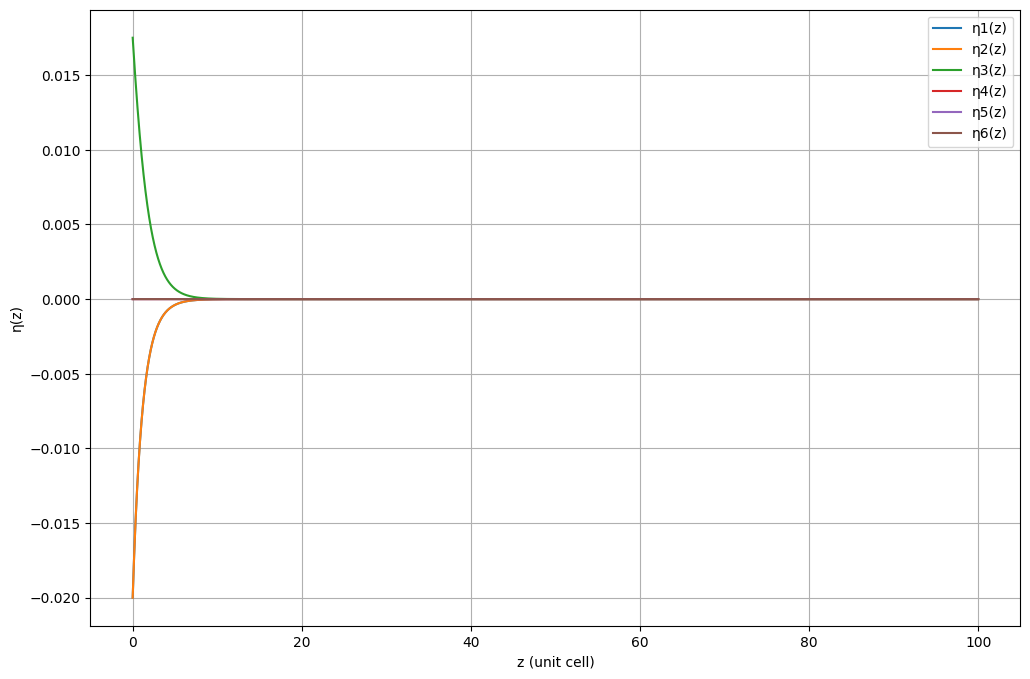

array([[-2.00000000e-02, -1.99824414e-02, -1.99648992e-02, ...,
        -1.54583988e-33, -1.54473945e-33, -1.54363981e-33],
       [-2.00000000e-02, -1.99824414e-02, -1.99648992e-02, ...,
        -1.54583988e-33, -1.54473945e-33, -1.54363981e-33],
       [ 1.75063613e-02,  1.74973862e-02,  1.74884133e-02, ...,
         2.94489275e-33,  2.94279640e-33,  2.94070154e-33],
       [ 1.00000000e-34,  9.99004473e-35,  9.98009938e-35, ...,
         5.55387244e-78,  5.54834341e-78,  5.54281989e-78],
       [ 1.00000000e-34,  9.99004473e-35,  9.98009938e-35, ...,
         5.55387244e-78,  5.54834341e-78,  5.54281989e-78],
       [ 1.00000000e-34,  9.98723341e-35,  9.97448312e-35, ...,
         3.32389165e-90,  3.31964818e-90,  3.31541012e-90]])

In [20]:
import numpy as np
from scipy.linalg import eigh,eig
import matplotlib.pyplot as plt

# Set parameters
a0=3.96883 # [Angstrom]
B11, B12, B44 = 117.9, 51.6, 137.0 #[eV]
C11, C12, C44 = B11/a0**3, B12/a0**3, B44/a0**3 #[eV/Angstrom^3]
E11, E12, E22, E24, E33, E1616 = 1.08551, 0.14572, 0.84221, 0.71708, 0.27613, 0.16786  #[eV/Angstrom], Alminum DOI: 10.1016/j.commatsci.2019.109316

# Construct matrix C
C = np.array([
    [C11, C12, C12, 0, 0, 0],
    [C12, C11, C12, 0, 0, 0],
    [C12, C12, C11, 0, 0, 0],
    [0, 0, 0, C44, 0, 0],
    [0, 0, 0, 0, C44, 0],
    [0, 0, 0, 0, 0, C44]
])

# Construct matrix E
E = np.array([
    [2*E22, E24, E12, 0, 0, 0],
    [E24, 2*E22, E12, 0, 0, 0],
    [E12, E12, 2*E11, 0, 0, 0],
    [0, 0, 0, 8*E33, 0, 0],
    [0, 0, 0, 0, 8*E33, 0],
    [0, 0, 0, 0, 0, 8*E1616]
])

# Initial conditions
um = -0.02
min_val = 1e-34
eta0 = np.array([um, um, -2*C12*um/C11, min_val, min_val, min_val])
v0 = np.array([min_val, min_val, min_val, min_val, min_val, min_val])

# Eigenvalue problem: (-E k^2 + C) v = 0
# Rearrange to E^{-1} C v = k^2 v
E_inv = np.linalg.inv(E)
eigvals, eigvecs = eigh(E_inv @ C)

# Select corresponding eigenvectors
# Select eigenvalues with positive k^2 for decaying solutions
# Select corresponding eigenvectors
positive_indices = eigvals > 0
k_values = np.sqrt(eigvals[positive_indices])
vectors = eigvecs[:, positive_indices]

# 一般解の形: η(z) = sum(a_i * v_i * exp(-k_i z) + b_i * v_i * exp(k_i z))
# 境界条件として z → ∞ で収束するため、b_i = 0 とする
# したがって、η(z) = sum(a_i * v_i * exp(-k_i z))

# 初期条件に基づく係数 a_i の決定
# η(0) = sum(a_i * v_i)
# dη/dz(0) = -sum(a_i * k_i * v_i) = v0

# ここでは v0 = 0 なので、sum(a_i * k_i * v_i) = 0
# ただし、v0 がゼロベクトルではなく、他の値を持つ場合は別途考慮が必要

# 係数 a_i を求めるための線形方程式
# [vectors | vectors * k_values] [a; b] = [eta0; v0]
# ただし、b_i = 0 とするので、直接 a_i を求める

# η(0) = vectors * a
# v0 = -vectors * (k_values) * a = 0
# つまり、初期条件を満たす a の解を求める

# 解は a = vectors^{-1} * eta0
# ただし、vectors は正規直交基底であるため、a = vectors^T * eta0

a = vectors.T @ eta0

# 範囲の定義
z_max = 100
z = np.linspace(0, z_max, 100000)

# 一般解の計算
eta = vectors @ (a[:, np.newaxis] * np.exp(-k_values[:, np.newaxis] * z))

# 各成分をプロット
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(z, eta[i, :], label=f'η{i+1}(z)')
plt.xlabel('z (unit cell)')
plt.ylabel('η(z)')
# plt.title('Solution η(z) of the Differential Equation with Exact Initial Conditions')
plt.legend()
plt.grid(True)
plt.show()
eta